In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle


In [ ]:
!echo '{"username":"mrunmayangaitkar","key":"bb996f05d5a0796d4cdb28b767ea760d"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# get the dataset

!kaggle datasets download -d kedarsai/bird-species-classification-220-categories

 99% 1.04G/1.06G [00:08<00:00, 164MB/s]
100% 1.06G/1.06G [00:08<00:00, 127MB/s]


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile(file="/content/bird-species-classification-220-categories.zip")

In [ ]:
zip_ref.extractall(path="/content/drive/MyDrive/Bird_Species_Classification/Data")
zip_ref.close()

In [ ]:
# Set the root directory
root_dir = "/content/drive/MyDrive/Bird_Species_Classification/"
data_dir = root_dir + "Data/"

import os

for dirpath, dirnames, filenames in os.walk(data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

In [ ]:
def view_random_image(target_dir):
  # Setup the folder path
  import os
  import random
  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  
  target_class = random.choice(os.listdir(target_dir))
  target_folder = target_dir + target_class

  # Get a random image
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read and plot the image
  image = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape: {image.shape}")

  return image


Image Shape: (375, 500, 3)


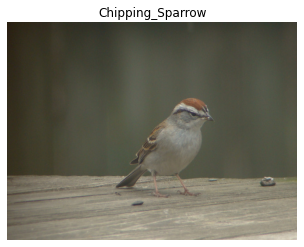

In [ ]:
# Viewing random_image in training directory

train_dir = data_dir + "Train/"
test_dir = data_dir + "Test/"

image = view_random_image(train_dir)

In [ ]:
# Set training and test directories
import tensorflow as tf

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMAGE_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMAGE_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE)

Found 9414 files belonging to 200 classes.
Found 2374 files belonging to 200 classes.


In [ ]:
# Creating a model

# input layer
inputs = tf.keras.layers.Input(shape=IMAGE_SIZE + (3,))

# EfficientNetB3
base_model_0 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_0.trainable = False
x = base_model_0(inputs)

# Pooling Layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Dense Output
outputs = tf.keras.layers.Dense(200, activation="softmax")(x)

# Model
model = tf.keras.Model(inputs, outputs, name="model_0")

# Compile
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Summary
model.summary()

16705208/16705208 [==============================] - 0s 0us/step
Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_4   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 200)               256200    
                                                                 
Total params: 4,305,771
Trainable params: 256,200
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=root_dir+"models/model_0")

In [ ]:
history = model.fit(train_data,
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    steps_per_epoch=len(train_data),
                    epochs=5,
                    callbacks=[checkpoint])

In [ ]:
model.evaluate(test_data)

75/75 [==============================] - 148s 2s/step - loss: 0.9996 - accuracy: 0.7430


[0.999555230140686, 0.743049681186676]

Model 0 showed only 74.3% accuracy on test data and took a lot of time to train

In [ ]:
# Another model but with image augmentation
# Creating a model

# input layer
inputs_1 = tf.keras.layers.Input(shape=IMAGE_SIZE + (3,))

# EfficientNetB3
base_model_1 = tf.keras.applications.EfficientNetB4(include_top=False)
base_model_1.trainable = False
x_1 = base_model_1(inputs_1)

# Pooling Layer
x_1 = tf.keras.layers.GlobalAveragePooling2D()(x_1)

# Dense Output
outputs_1 = tf.keras.layers.Dense(200, activation="softmax")(x_1)

# Model
model_1 = tf.keras.Model(inputs_1, outputs_1, name="model_1")

# Compile
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Summary
model_1.summary()

71686520/71686520 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb4 (Functional)  (None, None, None, 1792)  17673823 
                                                                 
 global_average_pooling2d_5   (None, 1792)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 200)               358600    
                                                                 
Total params: 18,032,423
Trainable params: 358,600
Non-trainable params: 17,673,823
_________________________________________________________________


In [ ]:
checkpoint_1 = tf.keras.callbacks.ModelCheckpoint(filepath=root_dir+"models/model_1")
history_1 = model_1.fit(train_data,
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    steps_per_epoch=len(train_data),
                    epochs=5,
                    callbacks=[checkpoint_1])

Epoch 1/5
 12/295 [>.............................] - ETA: 25:55 - loss: 5.2879 - accuracy: 0.0260

In [ ]:
tf.test.gpu_device_name()

''